In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import caffe
import cv2
caffe.set_mode_gpu()

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
#load the trained model
net = caffe.Net('../models/autoencoder/md593_autoencoder_test.prototxt','../models/autoencoder/md593_autoencoder_iter_5000.caffemodel', caffe.TEST)

In [4]:
#print the architecture of autoencoder, 
# where 'conv' denotes convolutoinal layer. where 'deconv' denotes deconvolutoinal layer
[(k, v.data.shape) for k, v in net.blobs.items()]

[('data', (1, 1, 100, 100)),
 ('conv1', (1, 16, 90, 90)),
 ('conv2', (1, 16, 80, 80)),
 ('pool1', (1, 16, 40, 40)),
 ('pool1_mask', (1, 16, 40, 40)),
 ('conv3', (1, 32, 36, 36)),
 ('conv4', (1, 32, 32, 32)),
 ('pool2', (1, 32, 16, 16)),
 ('pool2_mask', (1, 32, 16, 16)),
 ('unpool2', (1, 32, 32, 32)),
 ('deconv4', (1, 32, 36, 36)),
 ('deconv3', (1, 16, 40, 40)),
 ('unpool1', (1, 16, 80, 80)),
 ('deconv2', (1, 16, 90, 90)),
 ('deconv1', (1, 1, 100, 100))]

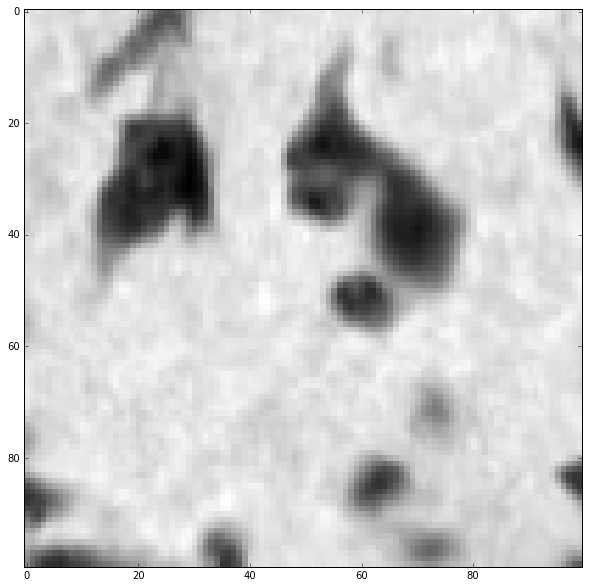

In [6]:
img = cv2.imread('../images/md593_test.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

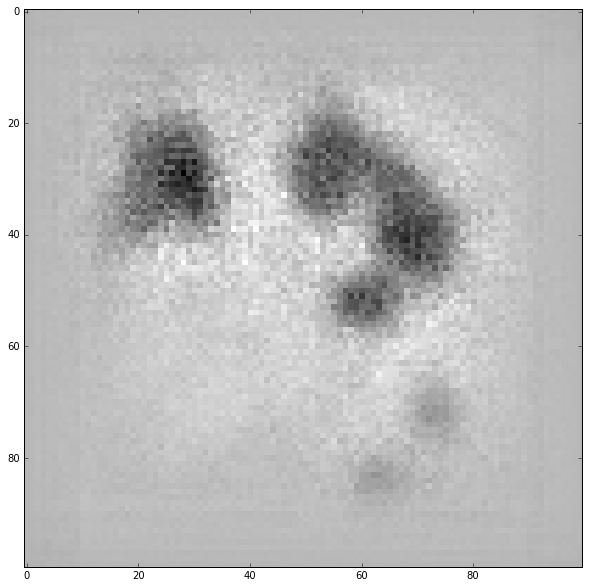

In [8]:
#plot test reconstructed patch
net.blobs['data'].data[...] = img * 0.00392156862
out = net.forward()
tmp = out['deconv1'].reshape(100,100)
plt.imshow(tmp)

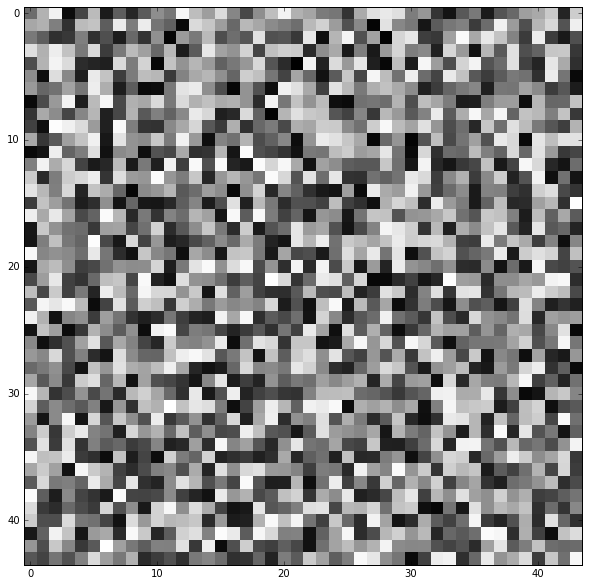

In [9]:
#visualized filters of conv1
filters = net.params['conv1'][0].data.reshape(4, 4, 11, 11).transpose(0, 2, 1, 3).reshape(4*11, 4*11)
plt.imshow(filters)

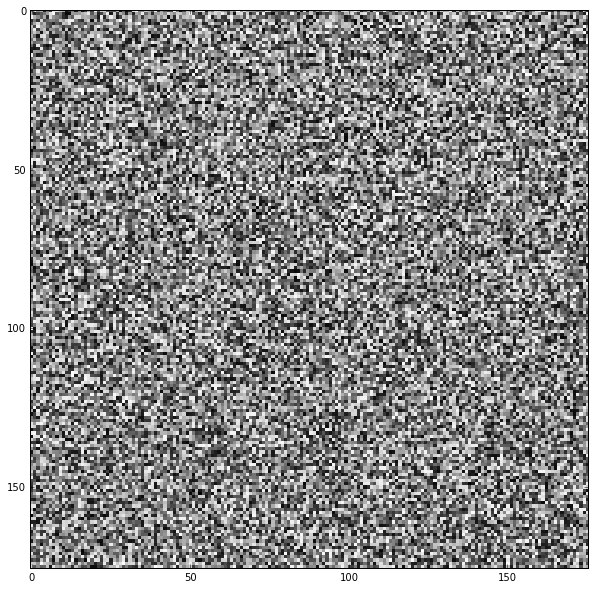

In [10]:
#visualized filters of conv2
filters = net.params['conv2'][0].data.transpose(0, 2, 1, 3).reshape(16*11, 16*11)
plt.imshow(filters)

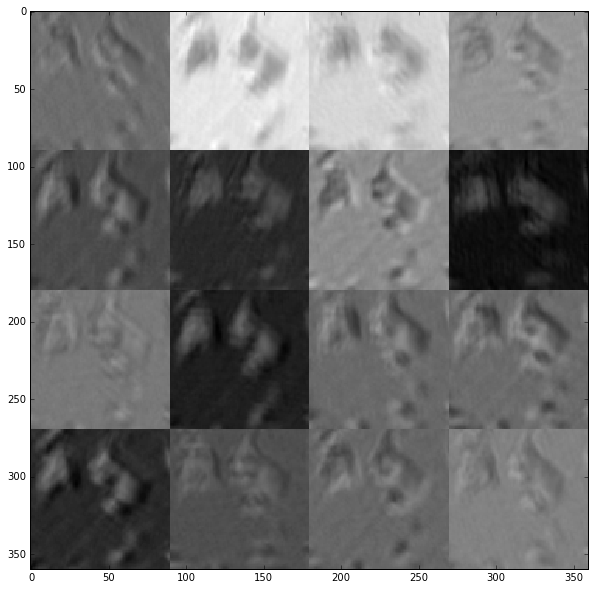

In [11]:
#show feature maps of layer conv1
fMap = net.blobs['conv1'].data[0].reshape(4, 4, 90, 90).transpose(0, 2, 1, 3).reshape(4*90, 4*90)
plt.imshow(fMap)

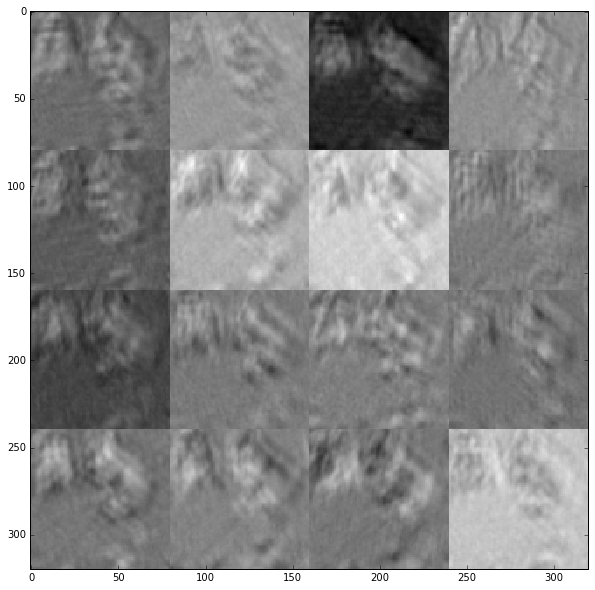

In [12]:
#show feature maps of layer conv2
fMap = net.blobs['conv2'].data.reshape(4,4,80,80).transpose(0, 2, 1, 3).reshape(4*80, 4*80)
plt.imshow(fMap)

(1, 32, 16, 16)


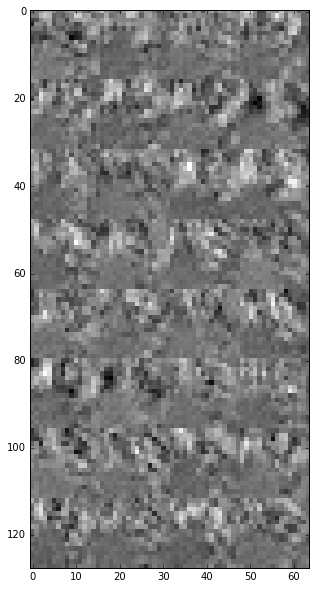

In [13]:
#show extracted features
print net.blobs['pool2'].data.shape
fMap = net.blobs['pool2'].data.reshape(8,4,16,16).transpose(0, 2, 1, 3).reshape(8*16, 4*16)
plt.imshow(fMap)  

(1, 16, 92, 92)


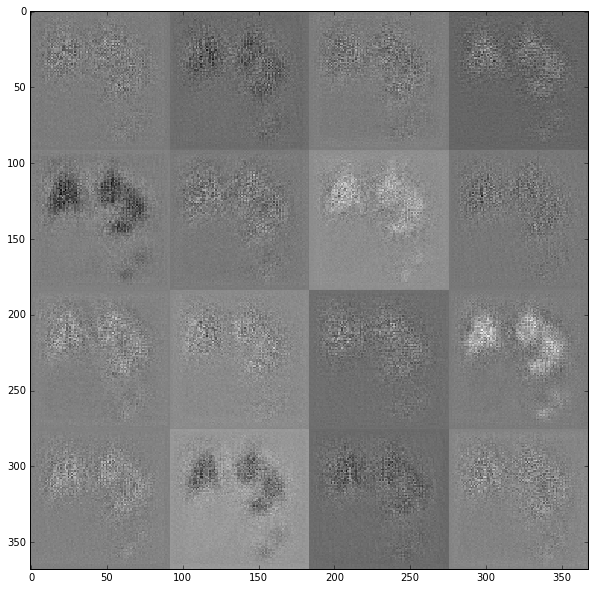

In [83]:
#show feature maps of layer deconv2
print net.blobs['deconv2'].data.shape
fMap = net.blobs['deconv2'].data.reshape(4,4,90,90).transpose(0, 2, 1, 3).reshape(4*90, 4*90)
plt.imshow(fMap)